In [1]:
from itertools import chain

import snap

import numpy as np
import matplotlib.pyplot as plt

# Analyzing the Wikipedia voters network

In [2]:
small_example_nodes = [
    1, 2, 3
]

small_example_edges = [
    [1, 2],
    [2, 1],
    [1, 3],
    [1, 1]
]

In [3]:
small_graph = snap.TNGraph.New()

for node in small_example_nodes:
    small_graph.AddNode(node)
    
for edge in small_example_edges:
    small_graph.AddEdge(*edge)

In [4]:
with open("Wiki-Vote.txt", "r") as f:
    data = f.read().split('\n')

In [5]:
edge_list = [d.split('\t') for d in data[4:-1]]
edge_list = [list(map(int, edge)) for edge in edge_list]

In [6]:
nodes = list(set(list(chain.from_iterable(edge_list))))

In [7]:
edge_list[:3]

[[30, 1412], [30, 3352], [30, 5254]]

In [8]:
# Initializing the graph
wiki_voters_graph = snap.TNGraph.New()

In [9]:
# Adding nodes to the graph.
for node in nodes:
    wiki_voters_graph.AddNode(node)
    
# Adding edges to the graph.
for edge in edge_list:
    wiki_voters_graph.AddEdge(*edge) # edge[0], edge[1]

In [10]:
print("Small-Network: Nodes %d, Edges %d" % (small_graph.GetNodes(), small_graph.GetEdges()))
print("Wiki-Network: Nodes %d, Edges %d" % (wiki_voters_graph.GetNodes(), wiki_voters_graph.GetEdges()))

Small-Network: Nodes 3, Edges 4
Wiki-Network: Nodes 7115, Edges 103689


### 1-) The number of nodes in the network

In [11]:
print("The number of nodes in the small network:", small_graph.GetNodes())
print("The number of nodes in the wiki-network is:", wiki_voters_graph.GetNodes())

The number of nodes in the small network: 3
The number of nodes in the wiki-network is: 7115


### 2-) The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E. (Gsmall has 1 self-edge.)

In [12]:
def get_self_edge_count(graph):
        
    self_edge_count = 0
    for edge in graph.Edges():
        if edge.GetSrcNId() == edge.GetDstNId():
            self_edge_count += 1
        
    return self_edge_count


small_self_edge_count = get_self_edge_count(small_graph)
print("Small-Graph the number of nodes with a self-loop:", small_self_edge_count)

self_edge_count = get_self_edge_count(wiki_voters_graph)
print("The number of nodes with a self-loop:", self_edge_count)

print(snap.CntSelfEdges(small_graph))
print(snap.CntSelfEdges(wiki_voters_graph))

Small-Graph the number of nodes with a self-loop: 1
The number of nodes with a self-loop: 0
1
0


### 3-) The number of directed edges in the network, i.e., the number of ordered pairs (a, b) ∈ E for which a 6= b.

In [13]:
def get_directed_edge_count(graph):
    
    count = 0
    for edge in graph.Edges():
        if edge.GetSrcNId() != edge.GetDstNId():
            count += 1
            
    return count


small_directed_edge_count = get_directed_edge_count(small_graph)
print("Small-Graph the number of directed edges:", small_directed_edge_count)

directed_edge_count = get_directed_edge_count(wiki_voters_graph)
print("Wiki-Graph the number of directed edges:", directed_edge_count)

print(snap.CntUniqDirEdges(small_graph))
print(snap.CntUniqDirEdges(wiki_voters_graph))

Small-Graph the number of directed edges: 3
Wiki-Graph the number of directed edges: 103689
3
103689


### 4-) The number of undirected edges in the network, i.e., the number of unique unordered pairs (a, b), a 6= b, for which (a, b) ∈ E or (b, a) ∈ E (or both).

In [14]:
def get_undirected_edge_count(graph):
    
    undirected_edges = set()
    for edge in graph.Edges():
        if edge.GetSrcNId() != edge.GetDstNId():
            undirected_edges.add(frozenset((edge.GetSrcNId(), edge.GetDstNId())))
        
    return len(undirected_edges)


small_undirected_edge_count = get_undirected_edge_count(small_graph)
print("Small-Graph the number of undirected edges:", small_undirected_edge_count)

undirected_edge_count = get_undirected_edge_count(wiki_voters_graph)
print("Wiki-Graph the number of undirected edges:", undirected_edge_count)

print(snap.CntUniqUndirEdges(small_graph))
print(snap.CntUniqUndirEdges(wiki_voters_graph))

Small-Graph the number of undirected edges: 2
Wiki-Graph the number of undirected edges: 100762
2
100762


### 5-) The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a, b), a 6= b, for which (a, b) ∈ E and (b, a) ∈ E. (Gsmall has 1 reciprocated edge.)

In [76]:
# Some weird, dirty solution.

def n_of_reciprocated_edges(graph):
    
    undirected_edges = set()
    count = 0

    for edge in graph.Edges():
        if edge.GetSrcNId() != edge.GetDstNId():
            pair = frozenset((edge.GetSrcNId(), edge.GetDstNId()))
            if pair in undirected_edges:
                count += 1
            else:
                undirected_edges.add(pair)
    
    return count

small_graph_count = n_of_reciprocated_edges(small_graph)
wiki_voters_graph_count = n_of_reciprocated_edges(wiki_voters_graph)

print("Number of reciprocated edges: ", small_graph_count)            
print("Number of reciprocated edges: ", wiki_voters_graph_count)

Number of reciprocated edges:  1
Number of reciprocated edges:  2927


### 6-) The number of nodes of zero out-degree.

In [15]:
print(snap.CntOutDegNodes(small_graph, 0))
print(snap.CntOutDegNodes(wiki_voters_graph, 0))

1
1005


### 7-) The number of nodes of zero in-degree.

In [16]:
print(snap.CntInDegNodes(small_graph, 0))
print(snap.CntInDegNodes(wiki_voters_graph, 0))

0
4734


### 8-) The number of nodes with more than 10 outgoing edges

In [18]:
out_deg_v = snap.TIntPrV()
snap.GetNodeOutDegV(wiki_voters_graph, out_deg_v)

In [25]:
count = 0
for pair in out_deg_v:
    if pair.GetVal2() > 10:
        count += 1

print("Number of nodes with more than 10 outgoing edges: ", count)

Number of nodes with more than 10 outgoing edges:  1612


### 9-) The number of nodes with fewer than 10 incoming edges

In [27]:
in_deg_v = snap.TIntPrV()
snap.GetNodeInDegV(wiki_voters_graph, in_deg_v)

count = 0
for pair in in_deg_v:
    if pair.GetVal2() < 10:
        count += 1

print("Number of nodes with less than 10 incoming edges: ", count)

Number of nodes with less than 10 incoming edges:  5165


# Further Analyzing the Wikipedia voters network

### 1-) 
(18 points) Plot the distribution of out-degrees of nodes in the network on a log-log scale.
Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes
in the network with out-degree equal to x. Restrict the range of x between the minimum
and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log
scale, use base 10 for both x and y axes.

In [77]:
snap.PlotOutDegDistr(wiki_voters_graph, "example", "out-degree")

In [78]:
with open("outDeg.example.tab", "r") as f:
    plt_data = f.read().split('\n')

In [79]:
plt_data[:4]

['#',
 '# out-degree. G(7115, 103689). 870 (0.1223) nodes with out-deg > avg deg (29.1), 462 (0.0649) with >2*avg.deg (Sat Sep 19 17:34:43 2020)',
 '#',
 '# Out-degree\tCount']

In [80]:
degree_count_list = []
for degree_count in plt_data[4:-1]:
    degree_count_list.append(list(map(int, degree_count.split('\t'))))
    
degrees, counts = zip(*degree_count_list)

In [81]:
degrees[:3], counts[:3]

((0, 1, 2), (1005, 2382, 704))

In [82]:
print("Number of nodes:", sum(counts))

Number of nodes: 7115


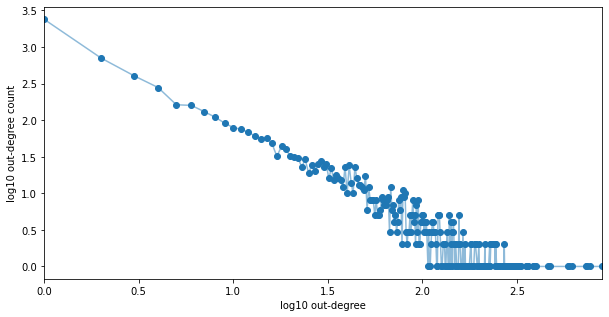

In [92]:
plt.figure(figsize=(10, 5))
# Skipping the first element which is the number of zero out degree nodes.
log_scale_counts = np.log10(counts[1:])
log_scale_degrees = np.log10(degrees[1:])

plt.plot(log_scale_degrees, log_scale_counts, alpha=0.5)
plt.scatter(log_scale_degrees, log_scale_counts)
plt.xlim([log_scale_degrees.min(), log_scale_degrees.max()])
plt.xlabel("log10 out-degree")
plt.ylabel("log10 out-degree count")
plt.show()

### 2-)

Compute and plot the least-square regression line for the out-degree distribution
in the log-log scale plot. Note we want to find coefficients a and b such that the function
log10 y = a · log10 x + b, equivalently, y = 10b
· x
a
, best fits the out-degree distribution.
What are the coefficients a and b? For this part, you might want to use the method called
polyfit in NumPy with deg parameter equal to 1.

In [95]:
a, b = np.polyfit(log_scale_degrees, log_scale_counts, deg=1)
a, b

(-1.281064705674565, 3.1324547044999114)

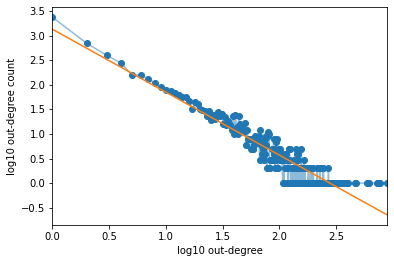

In [96]:
x = log_scale_degrees
y = a * x + b

plt.plot(log_scale_degrees, log_scale_counts, alpha=0.5)
plt.scatter(log_scale_degrees, log_scale_counts)
plt.xlim([log_scale_degrees.min(), log_scale_degrees.max()])
plt.plot(x, y)
plt.xlabel("log10 out-degree")
plt.ylabel("log10 out-degree count")
plt.show()

# Finding Experts on the Java Programming Language on StackOverflow

In [97]:
stack_overflow_network = snap.LoadEdgeList(snap.PNGraph, "stackoverflow-Java.txt", 0, 1)

In [120]:
stack_overflow_network.GetNodes(), stack_overflow_network.GetEdges()

(146874, 333606)

### 1-) 1. The number of weakly connected components in the network. This value can be calculated ain Snap.py via function GetWccs.

In [98]:
components = snap.TCnComV()

snap.GetWccs(stack_overflow_network, components)

In [99]:
len(components)

10143

### 2-) 2. The number of edges and the number of nodes in the largest weakly connected component. The largest weakly connected component is calculated in Snap.py with function GetMxWcc.

In [100]:
lw_cc = snap.GetMxWcc(stack_overflow_network)
print("Number of nodes in largest weakly connected component:", lw_cc.GetNodes())
print("Number of edges in largest weakly connected component:", lw_cc.GetEdges())

Number of nodes in largest weakly connected component: 131188
Number of edges in largest weakly connected component: 322486


### 3-) IDs of the top 3 most central nodes in the network by PagePank scores. PageRank scores are calculated in Snap.py with function GetPageRank.

In [103]:
page_rank_scores = snap.TIntFltH()

snap.GetPageRank(stack_overflow_network, page_rank_scores)

In [104]:
page_rank_scores.SortByDat(False)

In [105]:
for idx, k in enumerate(page_rank_scores):
    print(k, page_rank_scores[k])
    if idx == 2:
        break

992484 0.013980540412209575
135152 0.010005538895741885
22656 0.007103532693128619


In [115]:
node = stack_overflow_network.GetNI(992484)
node.GetInDeg(), node.GetOutDeg()

(1940, 1)

### 4-) IDs of the top 3 hubs and top 3 authorities in the network by HITS scores. HITS scores are calculated in Snap.py with function GetHits

In [116]:
n_id_hub_h = snap.TIntFltH()
n_id_auth_h = snap.TIntFltH()

snap.GetHits(stack_overflow_network, n_id_hub_h, n_id_auth_h)

n_id_hub_h.SortByDat(False)
n_id_auth_h.SortByDat(False)

In [117]:
print("Top 3 hubs by id:")
for idx, k in enumerate(n_id_hub_h):
    print(k, n_id_hub_h[k])
    node = stack_overflow_network.GetNI(k)
    print("Node in degree: {}".format(node.GetInDeg()))
    print("Node out degree: {}\n".format(node.GetOutDeg()))
    if idx == 2:
        break

print("="*50)

print("Top 3 authorities by id:")
for idx, k in enumerate(n_id_auth_h):
    print(k, n_id_auth_h[k])
    node = stack_overflow_network.GetNI(k)
    print("Node in degree: {}".format(node.GetInDeg()))
    print("Node out degree: {}\n".format(node.GetOutDeg()))
    if idx == 2:
        break

Top 3 hubs by id:
892029 0.07336380373389548
Node in degree: 3
Node out degree: 434

1194415 0.05955074418794487
Node in degree: 5
Node out degree: 374

359862 0.05687564588068672
Node in degree: 6
Node out degree: 193

Top 3 authorities by id:
22656 0.6047239730413133
Node in degree: 3999
Node out degree: 0

157882 0.2986993488728824
Node in degree: 2828
Node out degree: 6

571407 0.2839071934144654
Node in degree: 2714
Node out degree: 2

